In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,GRU
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [9]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [57]:
df = pd.read_csv('C:\\Users\\anjal\\Desktop\\PR\\NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [58]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [59]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [60]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


- There is no NaN data
- Date handled already
- next step is ploting our Data to see what is the important feature

# Ploting Data

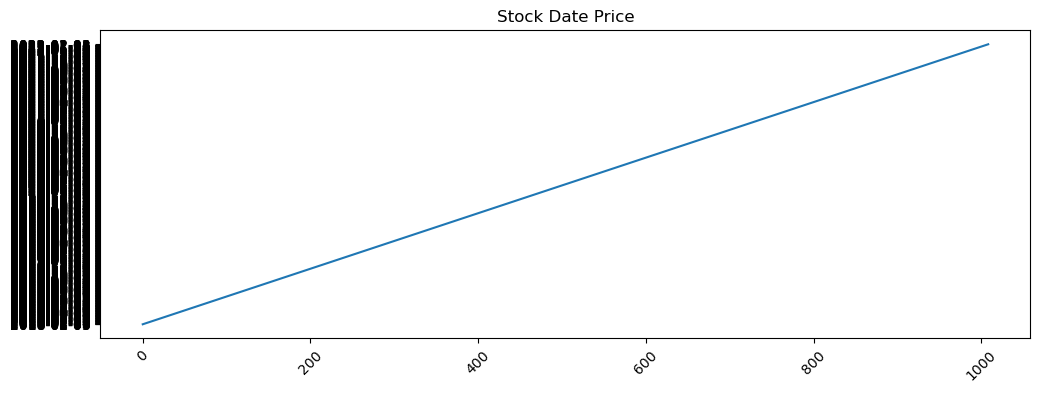

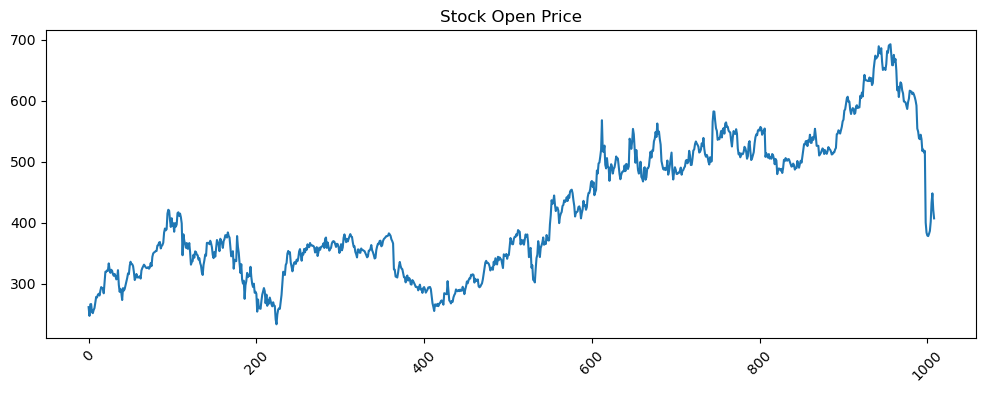

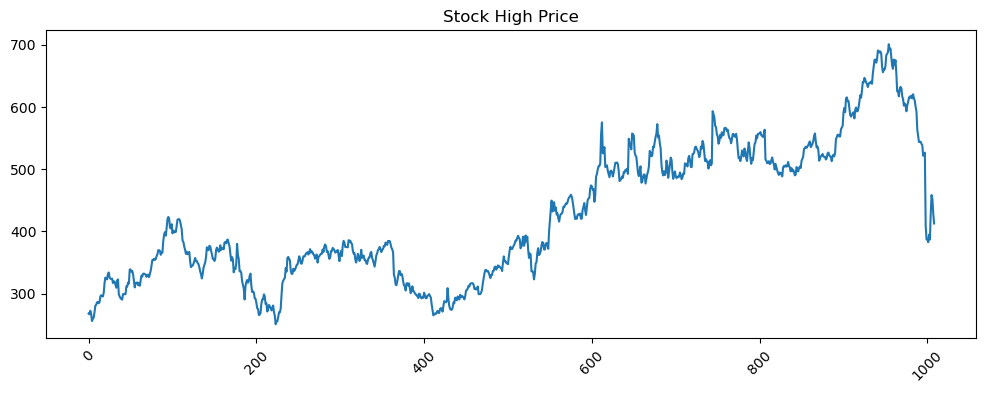

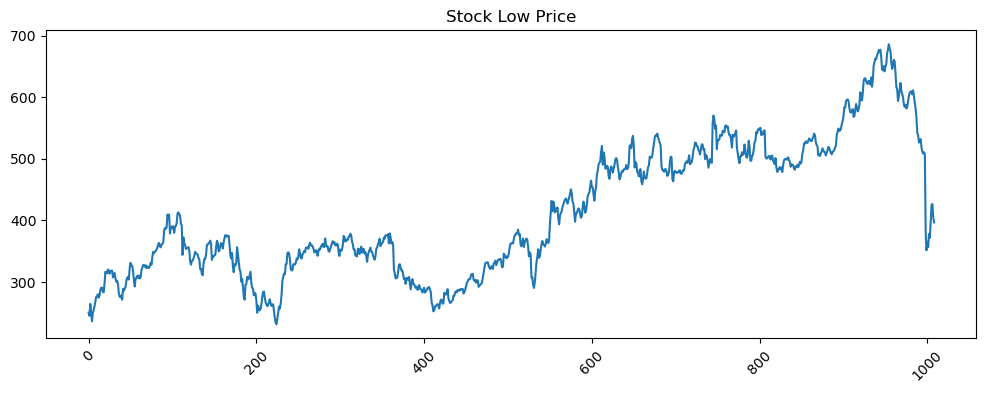

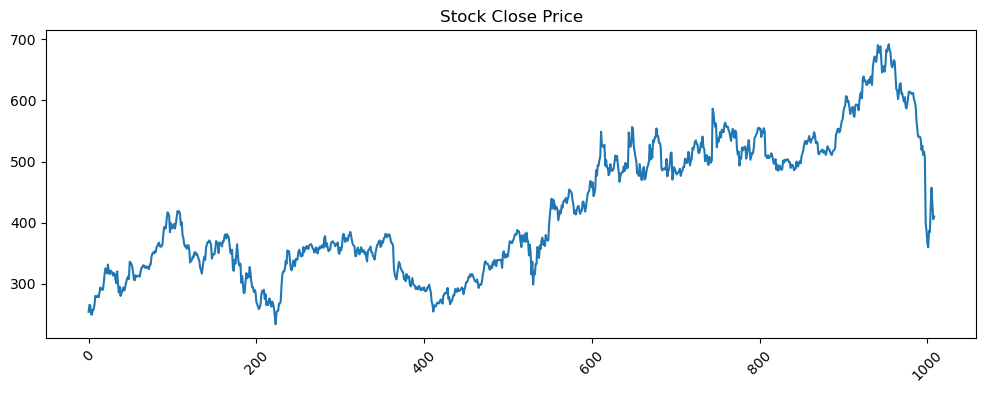

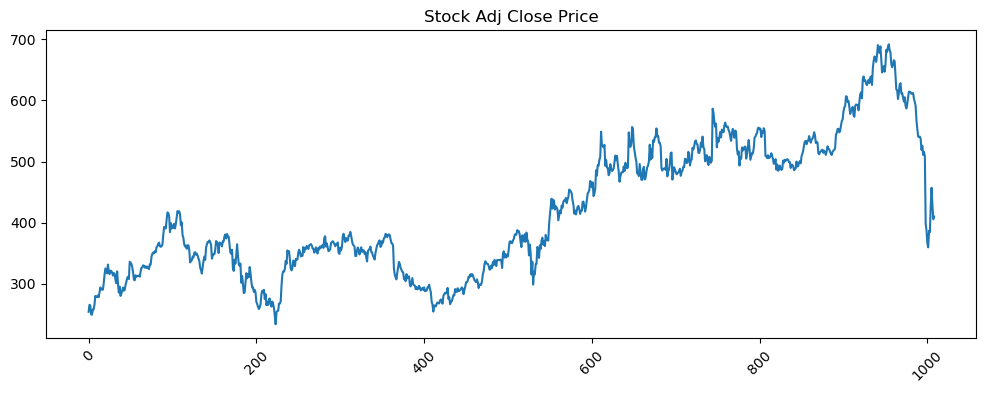

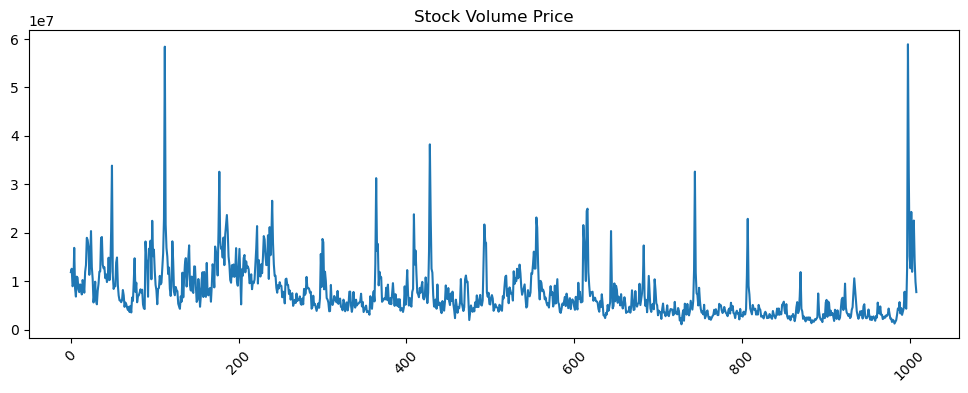

In [63]:
for columns in df.columns:
    plt.figure(figsize=(12,4))
    plt.title(f"Stock {columns} Price")
    plt.plot(df.index,df[columns])
    plt.xticks(rotation=45)

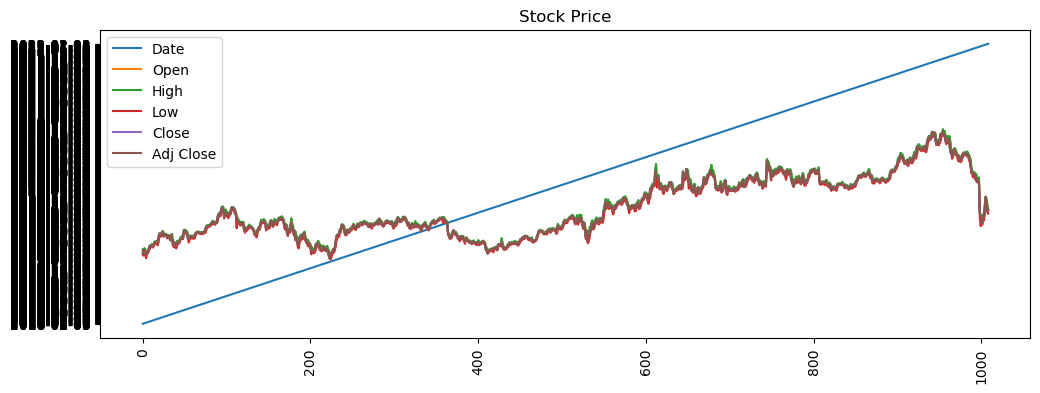

In [64]:
plt.figure(figsize=(12,4))
plt.title("Stock Price")
for columns in df.columns:
    if(columns !='Volume'):
        plt.plot(df.index,df[columns],label=columns)
plt.xticks(rotation=90)
plt.legend()

- after ploting Data we decide to take High feature to predict when the stock will be high
- next step we Data normalization

# Data Normalization

In [65]:
data=df['Close']
data.shape

(1009,)

In [66]:
data

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [67]:
scaler=MinMaxScaler(feature_range=(0,1))

In [68]:
df=scaler.fit_transform(np.array(data).reshape([data.shape[0],1]))

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df,test_size=0.2,random_state=0)

In [70]:
X_train.shape

(807, 1)

In [71]:
X_test.shape

(202, 1)

# Convert array Values into a dataset values

In [72]:
def create_seq(data,time_step=60):
    X=[]
    y=[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return X,y

In [73]:
time_step=100
X,y=create_seq(df,time_step)

In [74]:
len(X),len(y)

(908, 908)

## reshape input to be [samples, time-steps, features] which is required for LSTM

In [75]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [76]:
X.shape,y.shape

((908, 100, 1), (908, 1))

## Splitting the data

In [77]:
X_train,X_test,y_train,y_test=X[:int(data.shape[0]*0.8)],X[int(data.shape[0]*0.8):],y[:int(data.shape[0]*0.8)],y[int(data.shape[0]*0.8):]

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((807, 100, 1), (101, 100, 1), (807, 1), (101, 1))

# Model

# **LSTM** **Model**

In [79]:
model_lstm=Sequential()
model_lstm.add(LSTM(128,return_sequences=True,input_shape=X_train[0].shape))
model_lstm.add(LSTM(64,return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(16,activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[keras.metrics.RootMeanSquaredError()])
model_lstm.summary()

C:\Users\anjal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [80]:
model_lstm.fit(X_train,y_train,epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0491 - root_mean_squared_error: 0.2121
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0063 - root_mean_squared_error: 0.0784
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0028 - root_mean_squared_error: 0.0523
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0025 - root_mean_s

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 6.4055e-04 - root_mean_squared_error: 0.0253
Epoch 61/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 7.1428e-04 - root_mean_squared_error: 0.0267
Epoch 62/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 7.0935e-04 - root_mean_squared_error: 0.0266
Epoch 63/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 7.8540e-04 - root_mean_squared_error: 0.0280
Epoch 64/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 7.0389e-04 - root_mean_squared_error: 0.0265
Epoch 65/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 5.9506e-04 - root_mean_squared_error: 0.0244
Epoch 66/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 6.2762e-04 - root_mean_squared_error: 0.0249
Epoch 67/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 9.1287e-04 - root_mean_squared_error: 0.0301
Epoch 68/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 7.5016e-04 - root_mean_squared_error: 0.0274
Epoch 69/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/s

## Test the Model

In [81]:
trainPred=model_lstm.predict(X_train)
testPred=model_lstm.predict(X_test)
trainPred=scaler.inverse_transform(trainPred)
testPred=scaler.inverse_transform(testPred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


## Model performance

In [82]:
model_lstm.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0029 - root_mean_squared_error: 0.0534


[0.0031074087601155043, 0.05574413761496544]

# **GRU Model**

In [83]:
model_gru=Sequential()
model_gru.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model_gru.add(GRU(32,return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.20))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error',optimizer='adam')
model_gru.summary()

C:\Users\anjal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 100, 32)        │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 100, 32)        │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,065 (62.75 KB)

 Trainable params: 16,065 (62.75 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model_gru.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - loss: 0.0936 - val_loss: 0.0705
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0121 - val_loss: 0.0085
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0037 - val_loss: 0.0050
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 69/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 70/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 71/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 72/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 73/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 74/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 75/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 76/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 77/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 78/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 79/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms

## Test the Model

In [85]:
trainPred=model_gru.predict(X_train)
testPred=model_gru.predict(X_test)
trainPred=scaler.inverse_transform(trainPred)
testPred=scaler.inverse_transform(testPred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


## Model performance

In [86]:
model_gru.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0012    


0.001674120663665235

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions
train_predict_lstm = model_lstm.predict(X)
train_predict_gru = model_gru.predict(X)

# Inverse transform predictions and actuals to calculate error in original scale
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate MSE and MAE
mse_lstm = mean_squared_error(actual, train_predict_lstm)
mae_lstm = mean_absolute_error(actual, train_predict_lstm)
mse_gru = mean_squared_error(actual, train_predict_gru)
mae_gru = mean_absolute_error(actual, train_predict_gru)

print(f'LSTM MSE: {mse_lstm}, LSTM MAE: {mae_lstm}')
print(f'GRU MSE: {mse_gru}, GRU MAE: {mae_gru}')


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
LSTM MSE: 167.1606232539004, LSTM MAE: 8.697215038245112
GRU MSE: 167.96590071614074, GRU MAE: 9.404923353405923


## Ploting Performance

In [88]:
look_back=time_step
# shift train predictions for plotting (time step)

trainPredPlot=np.empty_like(scaler.inverse_transform(df))
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred

#shift test predictions for plotting(time_step)
testPredPlot=np.empty_like(scaler.inverse_transform(df))
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred


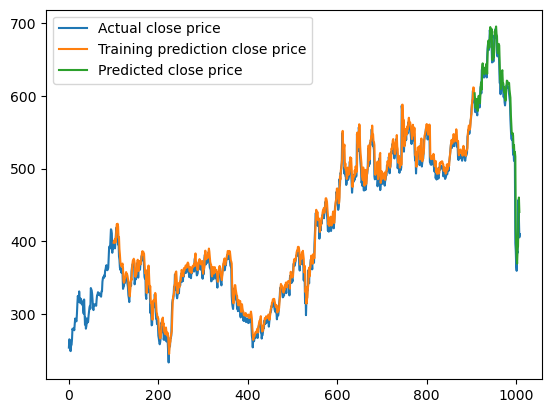

In [89]:
plt.plot(scaler.inverse_transform(df),label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


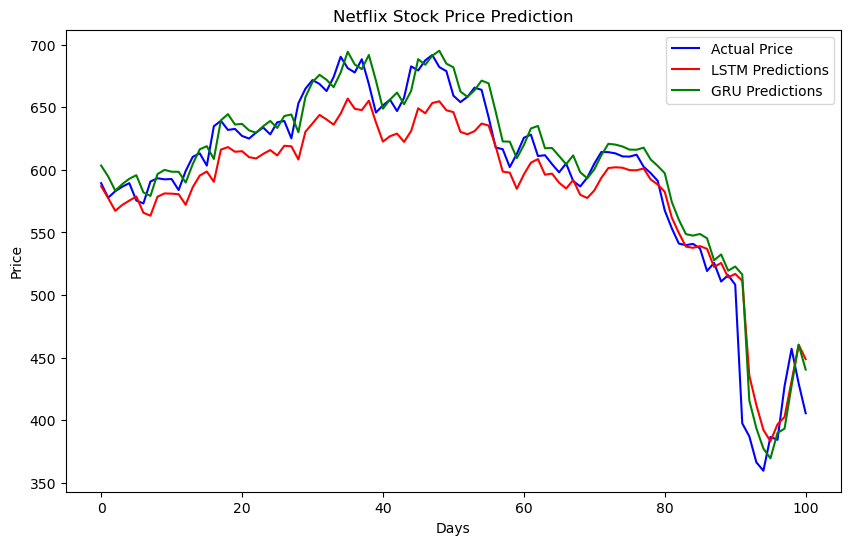

In [90]:
# Making predictions
pred_lstm = model_lstm.predict(X_test)
pred_gru = model_gru.predict(X_test)

# Invert predictions
pred_lstm = scaler.inverse_transform(pred_lstm)
pred_gru = scaler.inverse_transform(pred_gru)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Price', color='blue')
plt.plot(pred_lstm, label='LSTM Predictions', color='red')
plt.plot(pred_gru, label='GRU Predictions', color='green')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Random** **Forest**

In [91]:
data = pd.read_csv('C:\\Users\\anjal\\Desktop\\PR\\NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [92]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [93]:
cm = sns.light_palette("green", as_cmap=True)
data.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [94]:
print(data.columns)
print(data.shape)
std = StandardScaler()
data.drop([
    'Date'
],axis = 1, inplace = True)
data = std.fit_transform(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1009, 7)


In [95]:
new_data = pd.DataFrame(data)
new_data.head()

,0,1,2,3,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045


In [96]:
Y = new_data[3]
X = new_data.drop([3], axis=1)

In [97]:
X.head()

,0,1,2,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,1.709045


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [99]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred = np.nan_to_num(model.predict(X_test))
    print(mse(y_test, y_pred))
    print(mae(y_test, y_pred))
    ms.append(mse(y_test, y_pred))
    ma.append(mae(y_test, y_pred))

In [100]:
model = RandomForestRegressor(n_estimators = 5)
model_training_and_score(model)

0.00037442448882565817
0.00879238525778475


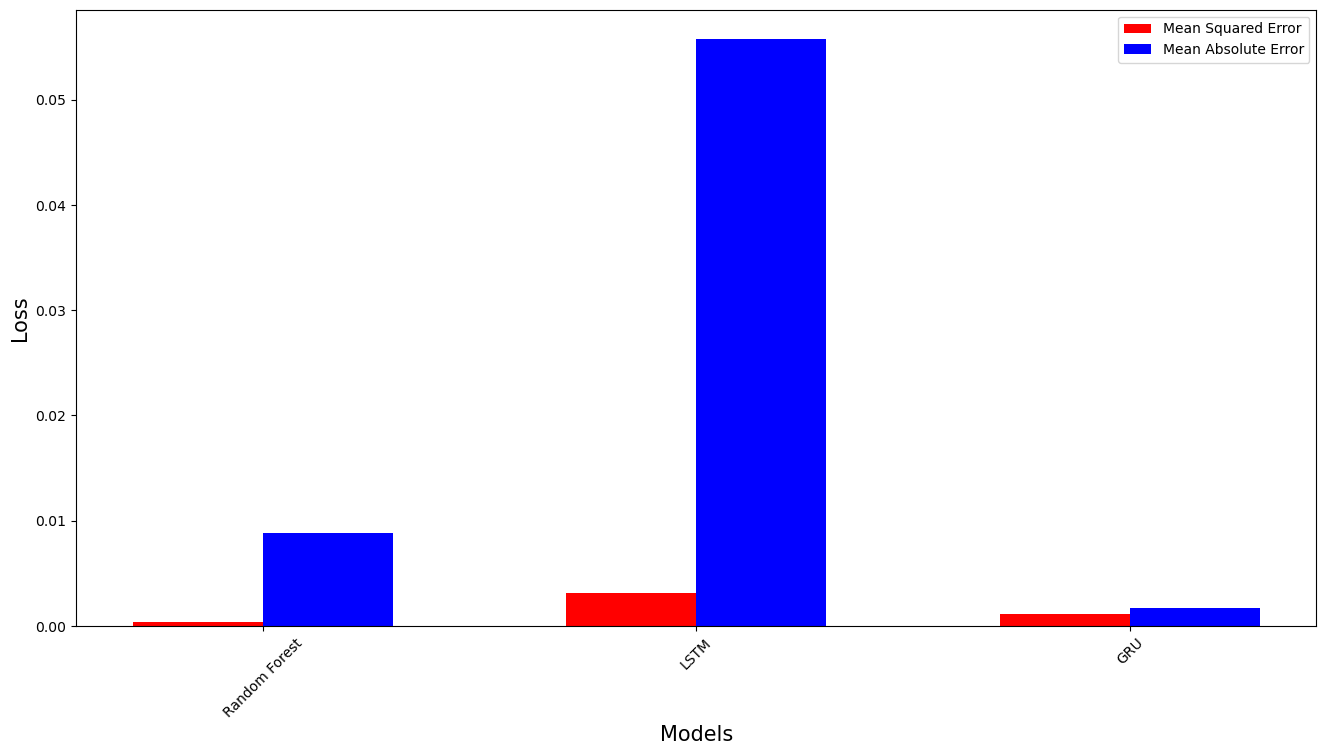

In [113]:
barwidth = 0.3
fig = plt.subplots(figsize =(16, 8))
br1 = np.arange(len(ms))
br2 = [x + barwidth for x in br1]

models = ["Random Forest", "LSTM", "GRU"]
plt.bar(br1, ms, color='red', width=barwidth, label='Mean Squared Error')
plt.bar(br2, ma, color='blue', width=barwidth, label='Mean Absolute Error')

# Adding Xticks
plt.xlabel("Models", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(br1 + barwidth / 2, models, rotation=45)
plt.legend()
plt.show()